# Ejercicios de Numpy y Pandas

Primero obtengamos data con que trabajar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def generate_time_series(batch_size, n_steps):
    """
    Generate a time series of length n_steps
    batch_size: number of examples to generate
    n_steps: length of time series
    """

    freq1, freq2, offsets1, offsets2 = np.random.rand(4)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(n_steps) - 0.5)   # + noise
    return series.astype(np.float32)


In [ ]:
np.random.seed(42) #Fijamos la semilla para que el analisis sea reproducible

n_steps = 50
series = generate_time_series(1, n_steps)
print( series.shape )
print( type(series) )

(50,)
<class 'numpy.ndarray'>


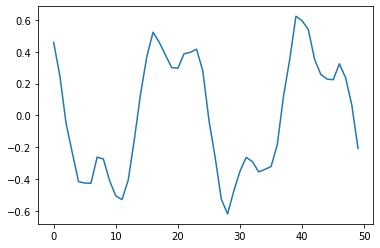

In [ ]:
plt.plot(series)
plt.show()

Ahora que tenemos el numpy array "serie", calcule los siguientes valores usando numpy:

* El promedio y desviación estandar
* La mediana
* Percentiles 25, 50, 75
* Máximo y mínimo
* Índices donde se encuentran el máximo y mínimo

In [ ]:
#Promedio & Desv. Std
print( np.mean( series ) )
print( np.std( series ) )

0.004527357
0.3666793


In [ ]:
# Percentiles
print( np.quantile( series, 0.25 ) )
print( np.quantile( series, 0.5 ) )
print( np.quantile( series, 0.75 ) )

-0.3357641100883484
0.01670955680310726
0.34390439838171005


In [ ]:
#Maximo y Minimo
print( np.max( series ) )
print( np.min( series ) )

#Indices
print( np.argmax( series ) )
print( np.argmin( series ) )

#Verifiquemos que se cumplen los indices
print(series[ np.argmax( series ) ])
print(series[ np.argmin( series ) ])

0.62338436
-0.62036383
39
28
0.62338436
-0.62036383


Usando pandas, convierta el array "serie" a un pandas DataFrame o Series, y trate de graficarlo usando pandas

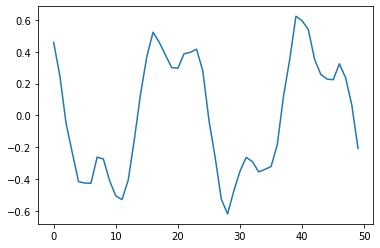

In [ ]:
pd.Series(series).plot()

## Ejemplo con Titanic dataset

Veamos un ejemplo trabajando con un dataframe

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Ahora responda a las siguientes preguntas usando funciones de pandas

In [ ]:
# ¿Cuántas personas sobrevivieron? ¿Qué porcentaje son del total?

titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
titanic['survived'].value_counts(normalize= True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

342 personas sobrevivieron, que son un 38% de la gente

In [ ]:
# ¿Cuántos hombres y mujeres hay en el dataset?

titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [ ]:
# ¿Cuál es la edad promedio? ¿edad promedio por género? ¿edad promedio de la gente que sobrevivió?
# Hint: use la función "groupby"

titanic['age'].mean()

29.69911764705882

In [ ]:
titanic.groupby('sex')['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [ ]:
titanic.groupby('survived')['age'].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [ ]:
# Calcule el fare promedio por clase
titanic.groupby('class')['fare'].mean()


class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [ ]:
# ¿Cuál es la clase mayoritaria de la gente que sobrevivió?

#Primera solucion, eligimos todos los clientes que sobrevivieron
survived = titanic.loc[titanic['survived']==1]
survived.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
survived['class'].value_counts()

First     136
Third     119
Second     87
Name: class, dtype: int64

In [ ]:
#2nda opcion, usar crosstab

pd.crosstab(index = titanic['survived'], columns = titanic['class'])

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119
